In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
import nltk
from sklearn import metrics
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer



DATA LOADING

In [2]:
data = pd.read_csv('data/Dataset.csv')

In [15]:
data.head()

,title,text,label,full_text
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1,NaN,Did they post their votes for Hillary already?,1,NaN
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri..."
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...


Dropping the duplicated "Unnamed: 0" Column

In [4]:
data.drop(columns=['Unnamed: 0'],inplace = True)
data.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [5]:
data.describe()

,label
count,72134.000000
mean,0.514404
std,0.499796
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71576 non-null  object
 1   text    72095 non-null  object
 2   label   72134 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [9]:
Y = data.label
Y.value_counts(normalize = True).rename({1:'Real',0:'Fake'})

label
Real    0.514404
Fake    0.485596
Name: proportion, dtype: float64

Key Observation : 

    4 columns and 72134 rows
    Label is the Target Column
    Real : Fake ===> 51:49

In [29]:

data['full_text'] = data['title'].fillna('') + data['text'].fillna('')
data['Length'] = data['full_text'].apply(lambda x : len(x) - x.count(' '))
data['title'] = data['title'].fillna('')
data['text'] = data['text'].fillna('')

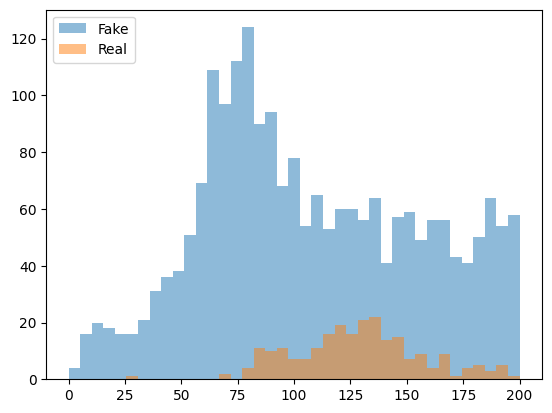

In [23]:
bins = np.linspace(0, 200, 40)

plt.hist(data[data["label"]== 1]["Length"], bins, alpha=0.5, label="Fake")
plt.hist(data[data["label"]== 0]["Length"], bins, alpha=0.5, label="Real")
plt.legend(loc="upper left")
plt.show()

Fake News are Generally Longer than real news

In [37]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], Y, test_size=0.33, random_state=53)

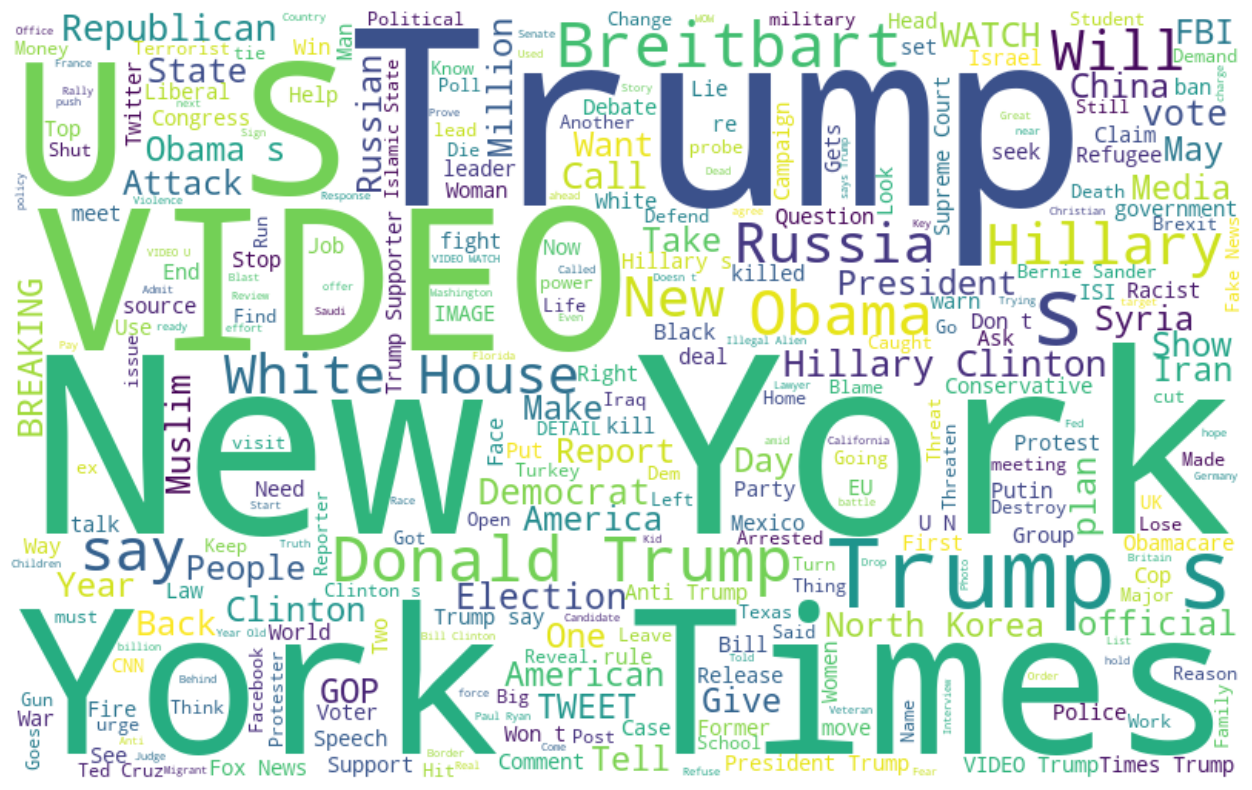

In [34]:
titles = ' '.join(data['title'])
wordcloud = WordCloud(
    background_color = 'white',
    max_words = 300,
    width = 800,
    height = 500
).generate(titles)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Visualization of REAL text

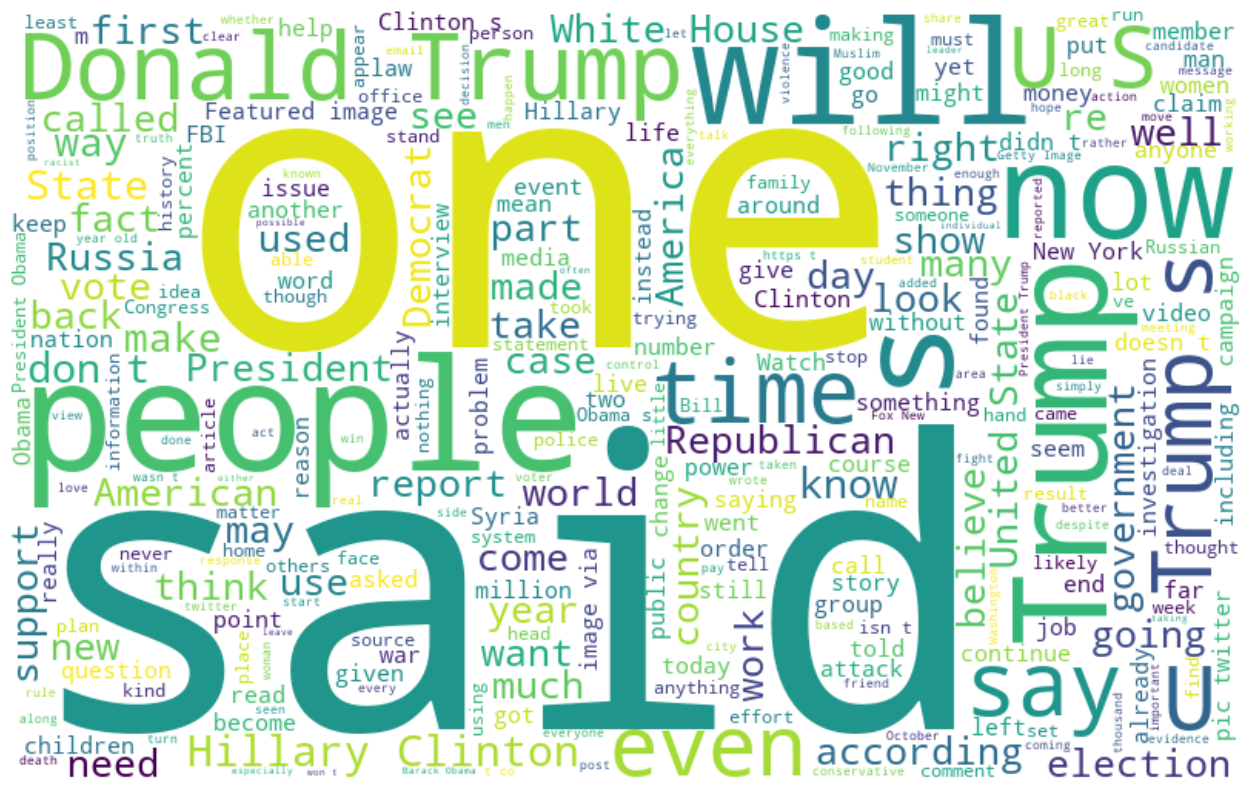

In [38]:
real_texts = X_train[y_train==1]
real_txt = ' '.join(text for text in real_texts)
wordcloud = WordCloud(
    background_color = 'white',
    max_words = 300,
    width = 800,
    height = 500
).generate(real_txt)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Visualizing FAKE texts

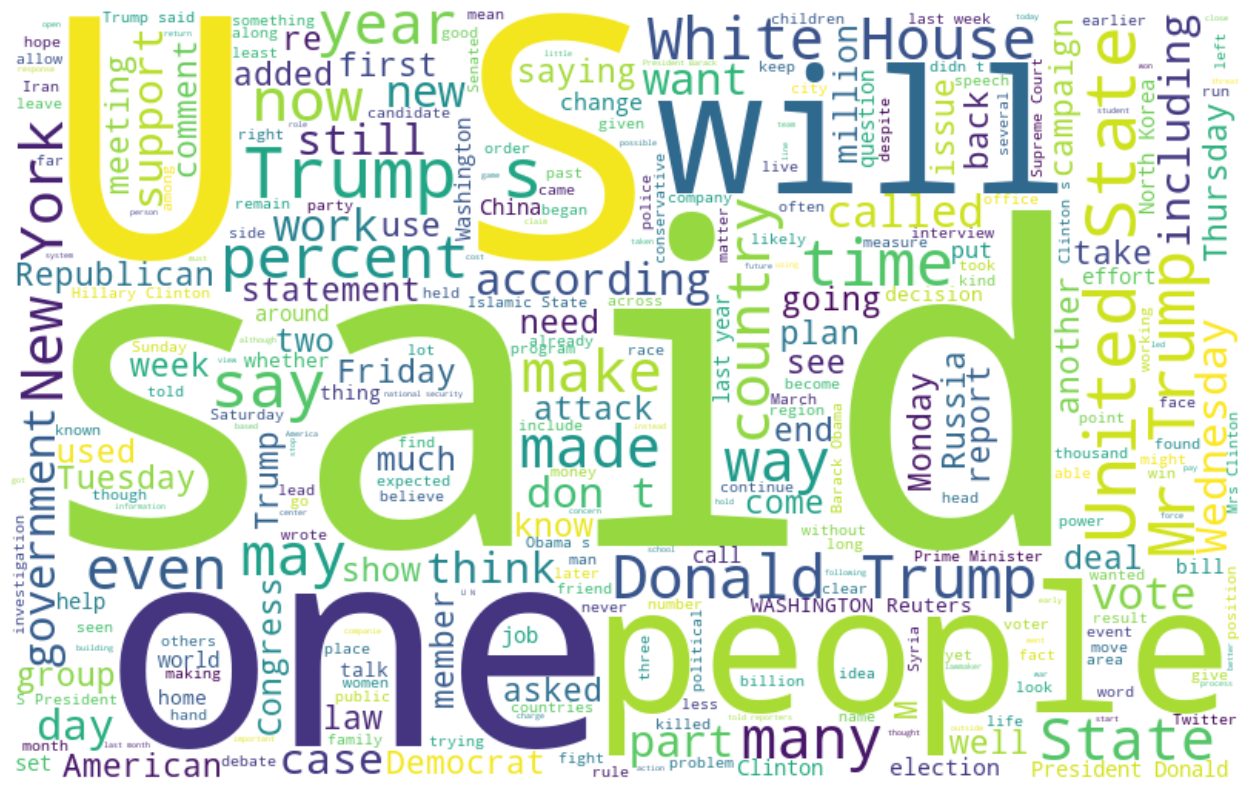

In [39]:
fake_texts = X_train[y_train==0]
fake_txt = ' '.join(text for text in fake_texts)
wordcloud = WordCloud(
    background_color = 'white',
    max_words = 300,
    width = 800,
    height = 500
).generate(fake_txt)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

                                                                                  NAIVE BAYES MODEL

BAG OF WORDS

In [40]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [41]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [42]:
pred = nb_classifier.predict(count_test)

In [46]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89     12100
           1       0.87      0.91      0.89     11705

    accuracy                           0.89     23805
   macro avg       0.89      0.89      0.89     23805
weighted avg       0.89      0.89      0.89     23805



Accuracy achieved using NB : 89%

                                                                                        Training Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=300)
model.fit(count_train, y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [48]:
pred2 = model.predict(count_test)
print(classification_report(pred2,y_test))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     11596
           1       0.94      0.93      0.94     12209

    accuracy                           0.93     23805
   macro avg       0.93      0.93      0.93     23805
weighted avg       0.93      0.93      0.93     23805

